In [ ]:
#install dependencies
#we are going to use MTCNN, apzac implementation
!pip install mtcnn

In [ ]:
#import modules
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import mtcnn

In [ ]:
#pre-process the data

#load image.
image = Image.open("/content/prueba-2.jpeg")
black_image = np.zeros([image.size[1],image.size[0],3])
black_image.fill(0)

#if image isn't RGB transform it.
if(image.getbands() != ('R','G','B')):
    image = image.convert('RGB')

#get data array from the image.
image_data = np.asarray(image);

#check the shape of the array
#image_data.shape

In [ ]:
# initialize the face detector
face_detector = mtcnn.MTCNN()

In [ ]:
#detect the faces
detection = face_detector.detect_faces(image_data)

#at this point we have already detected the faces and get all the data from the mtcnn algorithm (bounding box, main face points)

In [ ]:
# get all data to get the center of the face and the confidence
data_faces = np.array([[]])
init_flag = True

for each_item in detection:
    #if true initialize array, else append it
    x_mouth,y_mouth = ((each_item['keypoints']['mouth_right'][0] + each_item['keypoints']['mouth_left'][0])/2 , (each_item['keypoints']['mouth_right'][1] + each_item['keypoints']['mouth_left'][1])/2)
    x_eye, y_eye = ((each_item['keypoints']['right_eye'][0] + each_item['keypoints']['left_eye'][0])/2,(each_item['keypoints']['right_eye'][1] + each_item['keypoints']['left_eye'][1])/2)
    x_nose, y_nose = (each_item['keypoints']['nose'][0], each_item['keypoints']['nose'][1])
    (x_center, y_center) = ((x_nose + x_mouth + x_eye)/3 , (y_nose + y_mouth + y_eye)/3)
    confidence = each_item['confidence']
    if init_flag:
        #get a particular bounding box dimensions
        data_faces = np.array([[(x_center, y_center) ,confidence]])
        init_flag = False
    else:
        data_faces = np.vstack((data_faces,[(x_center, y_center),confidence]))

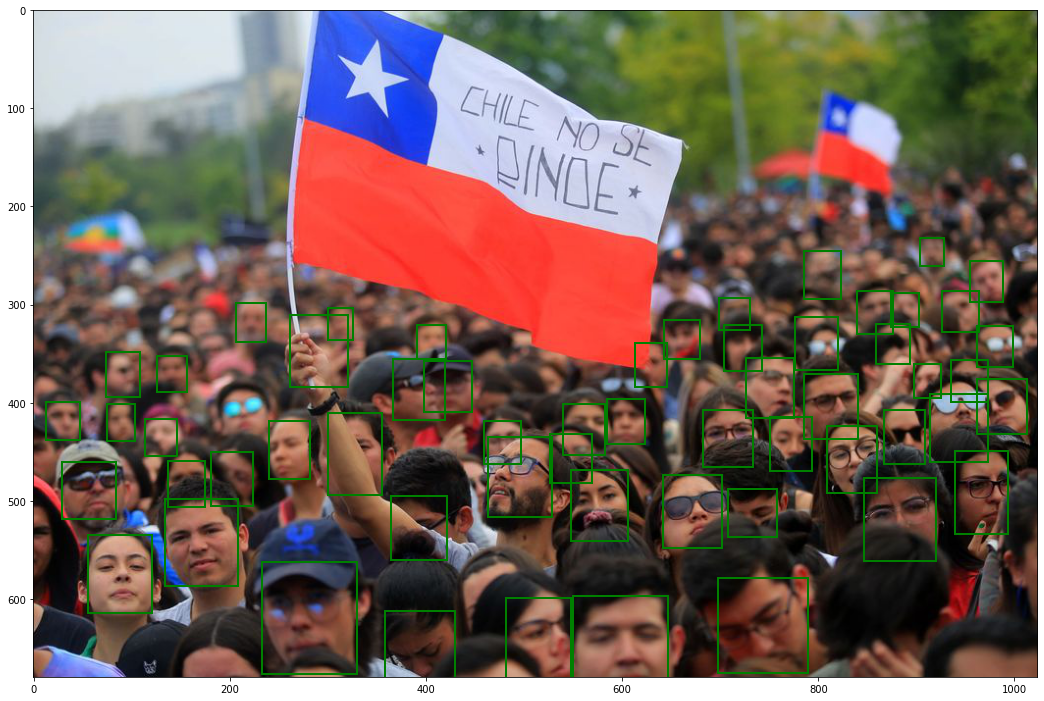

In [ ]:
#show the image with all bounding boxes
# create a new figure and initialize the axes
figure, axes = plt.subplots(1)

#display the original image, we are going to draw over it
axes.imshow(image_data)

#get all bounding boxes
for each_item in detection:

    #get a particular bounding box dimensions
    x, y, width, height = each_item['box']

    #create the bounding box for the image
    bounding_box = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='g', facecolor='none')
    
    #add the bounding box to the image
    axes.add_patch(bounding_box)

plt.show()

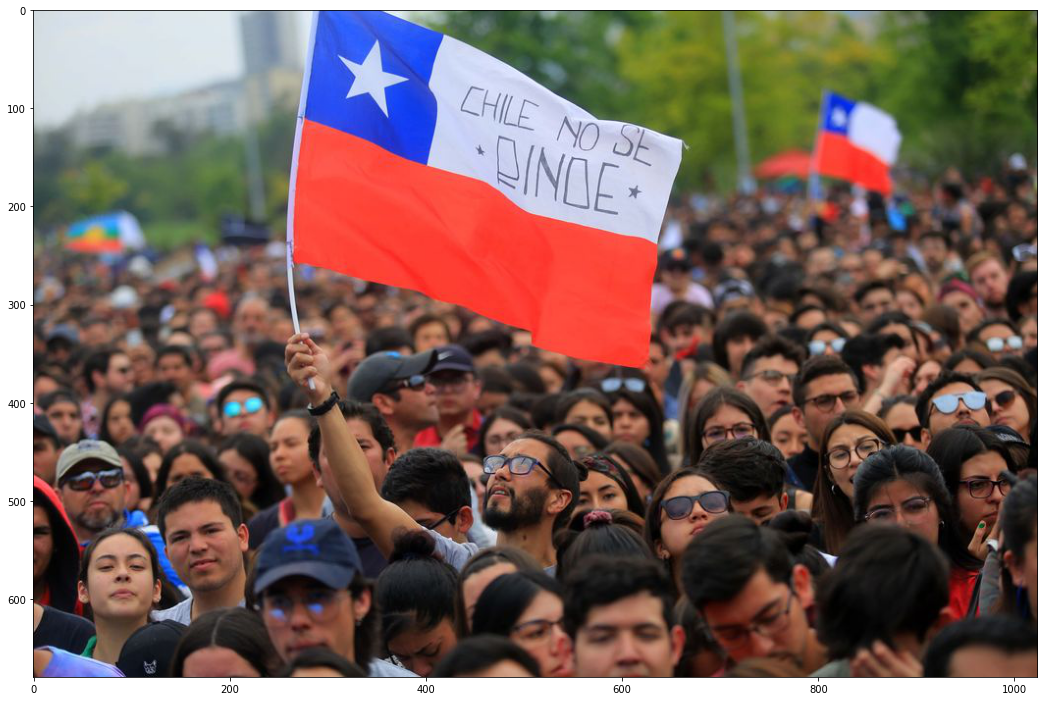

In [ ]:
#plot original image
figure, axes = plt.subplots(1)
axes.imshow(image_data)
figure.set_size_inches(18,30.7)

                       

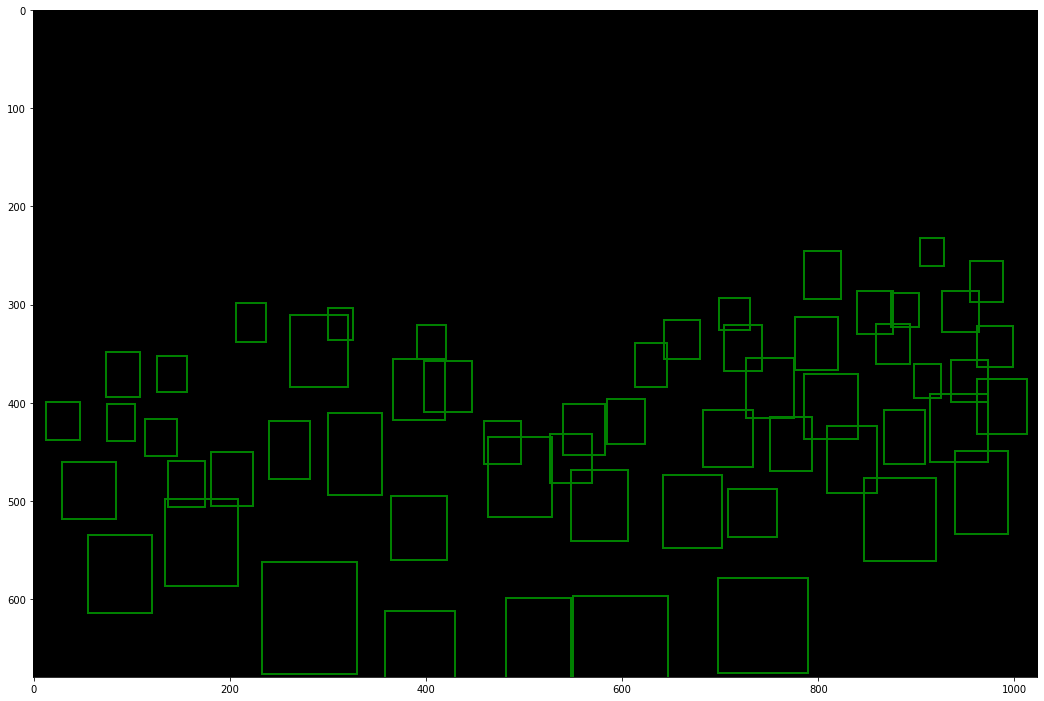

In [ ]:
#show a black image with all bounding boxes
# create a new figure and initialize the axes 
figure, axes = plt.subplots(1)
axes.imshow(black_image)

#get all bounding boxesYY
for each_item in detection:

    #get a particular bounding box dimensions
    x, y, width, height = each_item['box']

    #create the bounding box for the image
    bounding_box = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='g', facecolor='none')
    
    #add the bounding box to the image
    axes.add_patch(bounding_box)
plt.show()


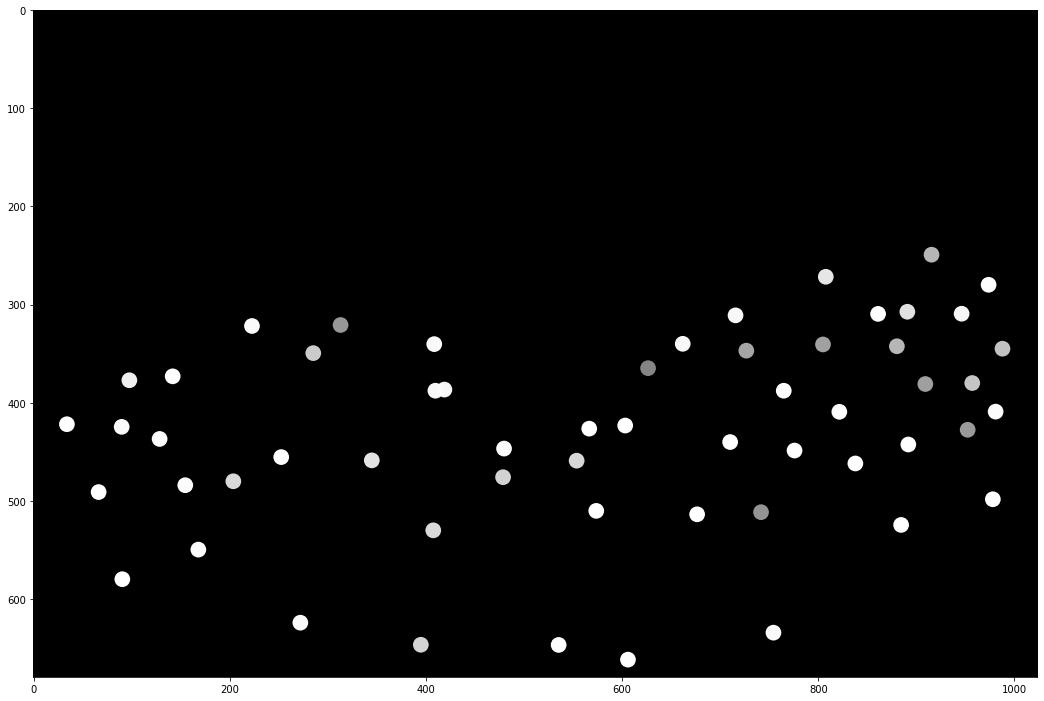

In [ ]:
#show a black image with the center of the face as a intensity dot
# create a new figure and initialize the axes 
figure, axes = plt.subplots(1)
axes.imshow(black_image)

#get all bounding boxesYY
for each_item in data_faces:

    #get a particular bounding box dimensions
    (x, y), intensity = each_item

    #create the bounding box for the image
    bounding_box = patches.Circle((x, y), radius=8, facecolor = (1*intensity,1*intensity,1*intensity,1*intensity))
    
    #add the bounding box to the image
    axes.add_patch(bounding_box)
plt.show()